# Data Wrangling
### Prepared By: Faris AlShammari

## Project Content

<ul>
    <li>
        <a href = '#gather'>Gathering</a>
    </li>
    <li>
       <a href = '#assess'> Assessing </a>
    </li>
    <li>
        <a href = '#clean'> Cleaning </a>
    </li>
    </ul>

<a id='gather'></a>
## 1- Gathering

### 1.1- Importing needed library

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import json
import requests as rq

### 1.2- Gathering the datasets.

#### 1.2.1- Twitter Archive.

In [2]:
df_Archive = pd.read_csv('twitter-archive-enhanced-2.csv')
df_Archive.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


#### 1.2.2- Image Predection.

In [3]:
#To Get the TSV.
getTSV = rq.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [4]:
import os
with open ('image_predictions-3.tsv','wb') as file:
    file.write(getTSV.content)

In [5]:
df_prediction = pd.read_csv('image_predictions-3.tsv', '\t')
df_prediction.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


#### 1.2.3- Twitter API

In [6]:
df_list = []

with open('tweet-json.txt', 'r', encoding='utf8') as api:
    for line in api:
        tweet_line = json.loads(line)
        df_list.append({'Tweet_id': tweet_line['id'],
                        'Likes': tweet_line['favorite_count'],
                        'RT': tweet_line['retweet_count']})
        
df_API = pd.DataFrame(df_list)
df_API.head(2)

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514


<a id='assess'></a>
## 2- Assessing.

### 2.1- Visual Assessment.

#### Twitter Archive.

In [7]:
#Display the Tweeter Archive table
df_Archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


`Twitter Archive` columns:

- **[tweet_id]:** each tweet has an unique ID.
- **[in_reply_to_status_id]:** it will show the tweet Unique ID, only if it's a reply tweet it.
- **[in_reply_to_user_id]:** it will show the User unique ID.
- **[timestamp]:** The date of publishing a tweet.
- **[source]:** it means the source that used for publishing a tweet, such as from a desktop website or mobile app.
- **[text]:** it means the content of a tweet.
- **[retweeted_status_id]:** The ID of Retweeted tweet.
- **[retweeted_status_user_id]:** The Account ID of who retweeted the tweet.
- **[retweeted_status_timestamp]:** Date of when it has been retweeted.
- **[expanded_urls]:** The URL link for the tweet.
- **[rating_numerator]** and **[rating_denominator]:** the first is the actual rate, the second means the standard rate which out of ten.
- **[name]:** row of dog's names.
- **[doggo]**, **[pupper]** and **[puppo]:** these rows are dogs category.

#### Image Predection

In [8]:
#Display the Image Predection table
df_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


`Image Predections` Columns:

- **[tweet_id]** it's the ID for a tweet.
- **[jpg_url]**: the tweet which include dog's photo.
- **[img_num]**: The number of photoes in a tweet.
- **[p1]:** is the algorithm's #1 prediction for the image in the tweet.
- **[p1_conf]:** is how confident the algorithm is in its #1 prediction.
- **[p1_dog]:** is whether or not the #1 prediction is a breed of dog
- **[p2]:** is the algorithm's #2 most likely prediction
- **[p2_conf]:** is how confident the algorithm is in its #2 prediction 
- **[p2_dog]:** is whether or not the #2 prediction is a breed of dog
- **[p3]:** is the algorithm's #3 most likely prediction
- **[p3_conf]:** is how confident the algorithm is in its #3 prediction 
- **[p3_dog]:** is whether or not the #3 prediction is a breed of dog

#### Twitter API.

In [9]:
df_API

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


`Tweeter API` Columns:

- **[Tweet_id]:** the ID number of a tweet.
- **[Likes]:** The number of people who likes the tweet.
- **[RT]:** The number of people who retweeted the tweet.

### 2.2- Programmatic Assessment.

#### 2.2.1- Twitter Archive.

In [10]:
df_Archive.head(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [11]:
df_Archive.tail(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2346,666058600524156928,NaN,NaN,2015-11-16 01:01:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is the Rand Paul of retrievers folks! He'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666058600...,8,10,the,None,None,None,None
2347,666057090499244032,NaN,NaN,2015-11-16 00:55:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",My oh my. This is a rare blond Canadian terrie...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666057090...,9,10,a,None,None,None,None
2348,666055525042405380,NaN,NaN,2015-11-16 00:49:46 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a Siberian heavily armored polar bear ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666055525...,10,10,a,None,None,None,None
2349,666051853826850816,NaN,NaN,2015-11-16 00:35:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an odd dog. Hard on the outside but lo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666051853...,2,10,an,None,None,None,None
2350,666050758794694657,NaN,NaN,2015-11-16 00:30:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666050758...,10,10,a,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [12]:
df_Archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [13]:
df_Archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [14]:
df_Archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2207,668627278264475648,NaN,NaN,2015-11-23 03:09:00 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Timofy. He's a pilot for Southwest. It...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668627278...,9,10,Timofy,None,None,None,None
341,832215726631055365,NaN,NaN,2017-02-16 13:11:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Moreton. He's the Good ...,7.932865e+17,4.196984e+09,2016-11-01 03:00:09 +0000,https://twitter.com/dog_rates/status/793286476...,13,10,Moreton,None,None,None,None
2059,671186162933985280,NaN,NaN,2015-11-30 04:37:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sparky. That's his pancake now. He wil...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671186162...,10,10,Sparky,None,None,None,None
1597,686050296934563840,NaN,NaN,2016-01-10 05:01:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Flávio. He's a Macedonian Poppycock. 9...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/686050296...,11,10,Flávio,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
1938,673906403526995968,NaN,NaN,2015-12-07 16:46:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Guys I'm getting real tired of this. We only r...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673906403...,3,10,None,None,None,None,None
2298,667070482143944705,6.670655e+17,4.196984e+09,2015-11-18 20:02:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After much debate this dog is being upgraded t...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
2164,669371483794317312,NaN,NaN,2015-11-25 04:26:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliviér. He's a Baptist Hindquarter. A...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669371483...,10,10,Oliviér,None,None,None,None
732,781524693396357120,NaN,NaN,2016-09-29 16:03:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Idk why this keeps happening. We only rate dog...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/781524693...,12,10,None,None,None,None,None
2062,671163268581498880,NaN,NaN,2015-11-30 03:06:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Pack of horned dogs here. Very team-oriented b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671163268...,8,10,None,None,None,None,None


In [15]:
#denominator issues.
df_Archive.query('rating_denominator > 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [16]:
#Zero denominator and no url. will dropped it
df_Archive.query('rating_denominator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [17]:
df_Archive.query('rating_denominator != 0 and rating_numerator == 0')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [18]:
df_Archive.query('tweet_id == "835246439529840640"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [19]:
#Names issues: for example
df_Archive.name.value_counts()

None       745
a           55
Charlie     12
Oliver      11
Lucy        11
          ... 
Farfle       1
Stu          1
Sparky       1
Noosh        1
Clyde        1
Name: name, Length: 957, dtype: int64

In [20]:
#Null or uncorrect names
df_Archive.query('name == "None" or name == "a"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [21]:
#Duplicated tweets.

df_Archive.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1    2
https://www.loveyourmelon.com/pages/ourstory,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1,https://twitter.com/dog_rates/status/820314633777061888/photo/1                       2
https://twitter.com/dog_rates/status/809220051211603969/photo/1,https://twitter.com/dog_rates/status/809220051211603969/photo/1                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                          

In [22]:
#the tweet which is duplicated
df_Archive.query(' expanded_urls == "https://twitter.com/dog_rates/status/679462823135686656/photo/1"')

#and also https://twitter.com/dog_rates/status/669000397445533696/photo/1

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None


In [23]:
#there is a null value in 'expanded_urls' column.
sum( df_Archive.expanded_urls.isnull() )

59

In [24]:
#i noticed that each column has two unique value eather its category name or 'None' so it should merged will be better.

df_Archive.doggo.unique()
#df_Archive.floofer.unique()
#df_Archive.pupper.unique()
#df_Archive.puppo.unique()

array(['None', 'doggo'], dtype=object)

`Twitter Archive`
### Quality:
- the HTML tag 'a' in the source column, the tag should be cutted.
- uncorrect names which is 'a', 'an', 'the', 'this', 'life' and 'None'.
- Rating issue with the tweet id (835246439529840640) the correct rate is (13/10) not (960/0)
- rating issue which is the dog rate is 0 in (835152434251116546) and (746906459439529985)
- dublicated Tweet ID. one of them (779124354206535695) and (679462823135686656)
- repeated url in (expanded_urls) such as with id (891327558926688256)
- Null URL. should be dropped.
- timestamp, change its data type to "datetime".
- Delete duplicates categories for a dog. with tweet ID (854010172552949000)

### Tidiness:
- the last 4 column should be combined into one column named "Category".
- rating_numerator and rating_denominator Columns should be merged into one column named "Rating".

#### Image Predection

In [25]:
df_prediction.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [26]:
df_prediction.tail(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2065,890240255349198849,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True
2066,890609185150312448,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish_terrier,0.487574,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True
2067,890729181411237888,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True
2068,890971913173991426,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,True,Border_collie,0.199287,True,ice_lolly,0.193548,False
2069,891087950875897856,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [27]:
df_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
977,707038192327901184,https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg,1,pug,0.642426,True,llama,0.057306,False,French_bulldog,0.054186,True
1548,792883833364439040,https://pbs.twimg.com/media/CwDjoH3WAAIniIs.jpg,3,jack-o'-lantern,0.999306,False,basketball,0.000113,False,standard_poodle,0.000083,True
435,674394782723014656,https://pbs.twimg.com/media/CVvueeeWwAUcQLR.jpg,1,toilet_tissue,0.134983,False,mosquito_net,0.133247,False,Lakeland_terrier,0.109099,True
1527,788908386943430656,https://pbs.twimg.com/media/CvLD-mbWYAAFI8w.jpg,1,remote_control,0.881538,False,oscilloscope,0.035513,False,golden_retriever,0.034090,True
708,685198997565345792,https://pbs.twimg.com/media/CYJQxvJW8AAkkws.jpg,1,dishwasher,0.888829,False,stove,0.013412,False,Old_English_sheepdog,0.009671,True
642,681339448655802368,https://pbs.twimg.com/media/CXSanNkWkAAqR9M.jpg,1,seat_belt,0.532441,False,Labrador_retriever,0.094615,True,kuvasz,0.089863,True
1601,799774291445383169,https://pbs.twimg.com/media/CsGnz64WYAEIDHJ.jpg,1,chow,0.316565,True,golden_retriever,0.241929,True,Pomeranian,0.157524,True
1717,819015331746349057,https://pbs.twimg.com/media/C12x-JTVIAAzdfl.jpg,4,prison,0.907083,False,palace,0.020089,False,umbrella,0.007850,False
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True
801,691444869282295808,https://pbs.twimg.com/media/CZiBcJhWQAATXNK.jpg,2,Bernese_mountain_dog,0.767563,True,Border_collie,0.085805,True,EntleBucher,0.043769,True


In [28]:
df_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [29]:
df_prediction.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [30]:
df_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/C12whDoVEAALRxa.jpg    2
https://pbs.twimg.com/media/CxqsX-8XUAAEvjD.jpg    2
https://pbs.twimg.com/media/Cveg1-NXgAASaaT.jpg    2
https://pbs.twimg.com/media/DFDw2tyUQAAAFke.jpg    2
https://pbs.twimg.com/media/CwJR1okWIAA6XMp.jpg    2
                                                  ..
https://pbs.twimg.com/media/CXsChyjW8AQJ16C.jpg    1
https://pbs.twimg.com/media/CVG4i9UWEAAUH3U.jpg    1
https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg    1
https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg    1
https://pbs.twimg.com/media/Cp1R0ZTWcAAaPO4.jpg    1
Name: jpg_url, Length: 2009, dtype: int64

In [31]:
df_prediction['p1'].value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
starfish                1
mailbox                 1
mortarboard             1
china_cabinet           1
flamingo                1
Name: p1, Length: 378, dtype: int64

In [32]:
#to make sure that we have not a tweet without an image.
df_prediction.query('img_num == 0')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [33]:
df_prediction[df_prediction['jpg_url'] == 'https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [34]:
df_prediction[df_prediction['jpg_url'] == 'https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg']

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True


`Image Prediction`

### Quality:
- duplicates tweet ID for the url (https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg) with two tweet_id which are (822244816520155136) & (823269594223824897), (https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg) with two tweet_id which are (777684233540206592) & (802624713319034886) which should be dropped.


- [p1_conf], [p2_conf] and [p3_conf] should be multiple by 100 to make it clear persentage.

#### Tweeter API

In [35]:
df_API.head()

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


In [36]:
df_API.tail()

,Tweet_id,Likes,RT
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48
2353,666020888022790149,2535,532


In [37]:
df_API.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Tweet_id  2354 non-null   int64
 1   Likes     2354 non-null   int64
 2   RT        2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [38]:
df_API.describe()

,Tweet_id,Likes,RT
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [39]:
df_API.sample(10)

,Tweet_id,Likes,RT
1611,685315239903100929,3676,1234
1847,675781562965868544,1750,537
12,889665388333682689,38818,8538
1158,724004602748780546,4561,1790
1033,744995568523612160,3277,716
1536,689835978131935233,2369,850
1348,704113298707505153,2031,629
283,838921590096166913,12183,2357
1967,673317986296586240,924,293
1508,691444869282295808,2890,955


In [40]:
# To make sure that there is not a valid data

df_API.query('Tweet_id != "Null"')
#df_API.query('Tweet_id != "Nan"')
#df_API.query('Tweet_id != " "')
#df_API.query('Tweet_id != "0"')

,Tweet_id,Likes,RT
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774
...,...,...,...
2349,666049248165822465,111,41
2350,666044226329800704,311,147
2351,666033412701032449,128,47
2352,666029285002620928,132,48


In [41]:
#when there is no '2' it means there is no duplicates.
df_API.Tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
                     ..
794926597468000259    1
673705679337693185    1
673342308415348736    1
754482103782404096    1
700151421916807169    1
Name: Tweet_id, Length: 2354, dtype: int64

`Twitter API`
### Quality:

- It seems that Twitter API Dataframe is clear and no need for cleaning.

### Tidiness:
- Should merge all the three dataframes into one dataframe.

<a id='clean'></a>
## 3- Cleaning.

### 3.1- Dataframes copy

In [42]:
df_Archive_clean = df_Archive.copy()
df_prediction_clean = df_prediction.copy()
df_API_clean = df_API.copy()

### 3.2- The cleaning process 
### 3.2.1- Twitter Archive

### Quality.

#### 1-Define

##### The HTML tag 'a' in the source column, the tag should be cutted.

#### Code

In [43]:
import re
df_Archive_clean.source = df_Archive_clean.source.apply(lambda x: re.sub('<[^<]+?>', '', x))

#### Test

In [44]:
df_Archive_clean['source']

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2356, dtype: object

#### 2-Define

##### uncorrect names which is 'a', 'an', 'the', 'this', 'life' and 'None'. i am going to replace all these names to "Unnamed".

#### Code

In [45]:
df_Archive_clean.name = df_Archive_clean.name.str.replace('a', 'Unnamed')
df_Archive_clean.name = df_Archive_clean.name.str.replace('an', 'Unnamed')
df_Archive_clean.name = df_Archive_clean.name.str.replace('the', 'Unnamed')
df_Archive_clean.name = df_Archive_clean.name.str.replace('this', 'Unnamed')
df_Archive_clean.name = df_Archive_clean.name.str.replace('life', 'Unnamed')
df_Archive_clean.name = df_Archive_clean.name.str.replace('None', 'Unnamed')

#### Test

In [46]:
df_Archive_clean.query('name == "None" or name == "life" or name == "a"\
                        or name == "an" or name == "the" or name == "this"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 3-Define

##### Rating issue with the tweet id (835246439529840640) the correct rate is (13/10) not (960/0) so i am going to change it to the correct rate

#### Code

In [47]:
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 835246439529840640, 'rating_numerator'] = 13
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 835246439529840640, 'rating_denominator'] = 10

#### Test

In [48]:
df_Archive_clean.query('tweet_id == "835246439529840640"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,Twitter for iPhone,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,13,10,Unnamed,None,None,None,None


#### 4-Define
##### rating issue which is the dog rate is 0 in (835152434251116546) and (746906459439529985)

#### Code

In [49]:
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 835152434251116546, 'rating_numerator'] = 0
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 835152434251116546, 'rating_denominator'] = 0

In [50]:
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 746906459439529985, 'rating_numerator'] = 0
df_Archive_clean.loc[df_Archive_clean['tweet_id'] == 746906459439529985, 'rating_denominator'] = 0

#### Test

In [51]:
df_Archive_clean.query('tweet_id == 835152434251116546')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,Twitter for iPhone,When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,0,Unnamed,None,None,None,None


In [52]:
df_Archive_clean.query('tweet_id == 746906459439529985')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,Twitter for iPhone,"PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,0,Unnamed,None,None,None,None


#### 5-Define

##### dublicated Tweet ID. one of them (779124354206535695) and (679462823135686656)

#### Code

In [53]:
df_Archive_clean.query('tweet_id == 779124354206535695 or tweet_id == 679462823135686656')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
749,779124354206535695,NaN,NaN,2016-09-23 01:04:56 +0000,Twitter for iPhone,RT @dog_rates: Meet Hurley. He's the curly one...,6.794628e+17,4.196984e+09,2015-12-23 00:45:35 +0000,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None
1742,679462823135686656,NaN,NaN,2015-12-23 00:45:35 +0000,Twitter for iPhone,Meet Hurley. He's the curly one. He hugs every...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679462823...,11,10,Hurley,None,None,None,None


In [54]:
df_Archive_clean = df_Archive_clean[df_Archive_clean['tweet_id'] != 679462823135686656]

#### Test

In [55]:
df_Archive_clean.query('tweet_id == "679462823135686656"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### 6-Define

##### Null values in expanded_urls column, so i am going to drop them.

#### Code

In [56]:
df_Archive_clean.dropna(subset=['expanded_urls'], inplace = True)

#### Test

In [57]:
sum( df_Archive_clean.expanded_urls.isnull() )

0

#### 7-Define

#### Convert timestamp DataType to datetime

#### Code

In [58]:
df_Archive_clean['timestamp']= pd.to_datetime(df_Archive_clean['timestamp']) 

#### Test

In [59]:
df_Archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   int64              
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   object             
 5   text                        2296 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  rating_numerator            2296 non-null   int64           

### Tidiness

#### 1-Define
##### The last 4 column should be combined into one column named "Category".

#### Code

In [60]:
df_Archive_clean['Category'] = df_Archive_clean.text.str.extract('(doggo|floofer|pupper|puppo)', expand = True)

In [61]:
#After the combination we should drop the four useless columns
df_Archive_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace = True)

#### Test

In [62]:
df_Archive_clean.Category.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: Category, dtype: int64

In [63]:
df_Archive_clean.query('Category == "pupper" or Category == "doggo" or\
                       Category == "puppo" or Category == "floofer" ')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,Category
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,CUnnamedssie,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,Twitter for iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,Unnamed,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,StuUnnamedrt,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,Twitter for iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,Twitter for iPhone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,JUnnamedzz,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,Twitter for iPhone,This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,Twitter for iPhone,This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,OpUnnamedl,pupper
2017,672160042234327040,NaN,NaN,2015-12-02 21:06:56+00:00,Twitter for iPhone,This is Bubba. He's a Titted Peebles Aorta. Ev...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672160042...,8,10,BubbUnnamed,pupper


#### 2-Define
##### rating_numerator and rating_denominator Columns should be merged into one column named "Rating".

#### Code

In [64]:
df_Archive_clean['Dog_Rate'] = df_Archive_clean.rating_numerator / df_Archive_clean.rating_denominator

In [65]:
##After the combination we should drop the two rate useless columns

df_Archive_clean.drop(['rating_numerator','rating_denominator'], axis=1, inplace = True)

#### Test

In [66]:
df_Archive_clean.sample(30)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,name,Category,Dog_Rate
1048,743253157753532416,NaN,NaN,2016-06-16 01:25:36+00:00,Twitter for iPhone,This is Kilo. He cannot reach the snackum. Nif...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743253157...,Kilo,puppo,1.0
241,846505985330044928,NaN,NaN,2017-03-27 23:35:28+00:00,Twitter for iPhone,THIS WAS NOT HIS FAULT HE HAD NO IDEA. 11/10 S...,NaN,NaN,NaN,https://twitter.com/shomaristone/status/846484...,Unnamed,NaN,1.1
592,798933969379225600,NaN,NaN,2016-11-16 17:01:16+00:00,Twitter for iPhone,This is Iroh. He's in a predicament. 12/10 som...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/798933969...,Iroh,NaN,1.2
2162,669393256313184256,NaN,NaN,2015-11-25 05:52:43+00:00,Twitter for iPhone,Meet Ronduh. She's a Finnish Checkered Blitzkr...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669393256...,Ronduh,NaN,1.0
367,828770345708580865,NaN,NaN,2017-02-07 01:00:22+00:00,Twitter for iPhone,This is Alfie. He's your Lyft for tonight. Kin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/828770345...,Alfie,NaN,1.3
1471,693993230313091072,NaN,NaN,2016-02-01 03:04:14+00:00,Vine - Make a Scene,These lil fellas are the best of friends. 12/1...,NaN,NaN,NaN,https://vine.co/v/i5ETazP5hrm,Unnamed,NaN,1.2
1461,694925794720792577,NaN,NaN,2016-02-03 16:49:55+00:00,Vine - Make a Scene,Please only send in dogs. This t-rex is very s...,NaN,NaN,NaN,https://vine.co/v/iJvUqWQ166L,Unnamed,NaN,0.5
595,798701998996647937,NaN,NaN,2016-11-16 01:39:30+00:00,Twitter for iPhone,RT @dog_rates: We normally don't rate marshmal...,7.186315e+17,4.196984e+09,2016-04-09 02:47:55 +0000,https://twitter.com/dog_rates/status/718631497...,Unnamed,NaN,1.0
604,798585098161549313,NaN,NaN,2016-11-15 17:54:59+00:00,Twitter for iPhone,RT @dog_rates: This is Timison. He just told a...,6.671828e+17,4.196984e+09,2015-11-19 03:29:07 +0000,https://twitter.com/dog_rates/status/667182792...,Timison,NaN,1.0
906,758041019896193024,NaN,NaN,2016-07-26 20:47:17+00:00,Twitter for iPhone,Teagan reads entire books in store so they're ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758041019...,Unnamed,NaN,0.9


### 3.2.2- Image Prediction

### Quality.

#### 1-Define
##### Duplicates tweet ID for the url (https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg) with two tweet_id which are (822244816520155136) & (823269594223824897), 
##### (https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg) with two tweet_id which are (777684233540206592) & (802624713319034886) which should be dropped.

#### Code

In [67]:
df_prediction_clean.query('jpg_url == "https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1738,822244816520155136,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [68]:
df_prediction_clean = df_prediction_clean[df_prediction_clean['tweet_id'] != 822244816520155136]

In [69]:
df_prediction_clean.query('jpg_url == "https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1457,777684233540206592,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True


In [70]:
df_prediction_clean = df_prediction_clean[df_prediction_clean['tweet_id'] != 777684233540206592]

#### Test

In [71]:
df_prediction_clean.query('jpg_url == "https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1746,823269594223824897,https://pbs.twimg.com/media/C2kzTGxWEAEOpPL.jpg,1,Samoyed,0.585441,True,Pomeranian,0.193654,True,Arctic_fox,0.071648,False


In [72]:
df_prediction_clean.query('jpg_url == "https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1619,802624713319034886,https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg,1,cocker_spaniel,0.253442,True,golden_retriever,0.16285,True,otterhound,0.110921,True


#### 2-Define
##### [p1_conf], [p2_conf] and [p3_conf] should be multiple by 100 to make it clear persentage.


#### Code

In [73]:
df_prediction_clean['p1_conf'] = df_prediction_clean.p1_conf * 100
df_prediction_clean['p2_conf'] = df_prediction_clean.p2_conf * 100
df_prediction_clean['p3_conf'] = (df_prediction_clean.p3_conf * 100)

#### Test

In [74]:
df_prediction_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,46.5074,True,collie,15.66650,True,Shetland_sheepdog,6.14285,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,50.6826,True,miniature_pinscher,7.41917,True,Rhodesian_ridgeback,7.20100,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,59.6461,True,malinois,13.85840,True,bloodhound,11.61970,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,40.8143,True,redbone,36.06870,True,miniature_pinscher,22.27520,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,56.0311,True,Rottweiler,24.36820,True,Doberman,15.46290,True


### Define
#### Combined all cleaned DataFrames into one dataframe `twitter_archive_master`


### Code

In [75]:
df_twitter_archive_master = pd.concat([df_Archive_clean, df_prediction_clean, df_API_clean], axis=1).reindex(df_Archive_clean.index)

### Test

In [76]:
df_twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2296 entries, 0 to 2355
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2296 non-null   float64            
 1   in_reply_to_status_id       23 non-null     float64            
 2   in_reply_to_user_id         23 non-null     float64            
 3   timestamp                   2296 non-null   datetime64[ns, UTC]
 4   source                      2296 non-null   object             
 5   text                        2296 non-null   object             
 6   retweeted_status_id         180 non-null    float64            
 7   retweeted_status_user_id    180 non-null    float64            
 8   retweeted_status_timestamp  180 non-null    object             
 9   expanded_urls               2296 non-null   object             
 10  name                        2296 non-null   object          

In [77]:
df_twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)

# Data Wrangling End

## Analysis

### Q1: Population of dog breed.

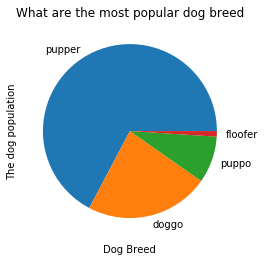

In [78]:
category_pop = df_twitter_archive_master.Category.value_counts()
category_pop.plot(kind = 'pie');
plt.xlabel('Dog Breed');
plt.ylabel('The dog population');
plt.title('What are the most popular dog breed');

In [79]:
df_twitter_archive_master.Category.value_counts()

pupper     263
doggo       90
puppo       34
floofer      4
Name: Category, dtype: int64

### Q2: The Statics of source tweets

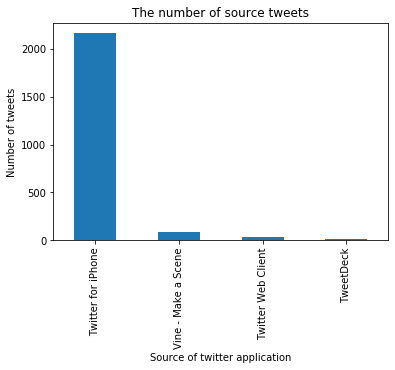

In [80]:
tweets_source = df_twitter_archive_master.source.value_counts()
tweets_source.plot(kind = 'bar');
plt.xlabel('Source of twitter application');
plt.ylabel('Number of tweets');
plt.title('The number of source tweets');

### Q3: Best Prediction.

In [81]:
#Prediction 1 is always right.
df_twitter_archive_master.p1_conf.mean()

59.46561686507945

In [82]:
df_twitter_archive_master.p2_conf.mean()

13.426473699817091

In [83]:
df_twitter_archive_master.p3_conf.mean()

6.002633579056114

### Q4: Best dog based on its Rate

In [84]:
df_twitter_archive_master.Dog_Rate.value_counts()

1.200000      551
1.100000      460
1.000000      457
1.300000      339
0.900000      155
0.800000      102
0.700000       52
1.400000       50
0.500000       36
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        5
7.500000        2
0.818182        2
3.428571        1
2.700000        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
1.500000        1
Name: Dog_Rate, dtype: int64

In [85]:
df_twitter_archive_master.query('Dog_Rate == 177.600000').name

979    Atticus
Name: name, dtype: object

In [86]:
df_twitter_archive_master.query('Dog_Rate == 0.1')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,Tweet_id,Likes,RT
605,7.985769e+17,NaN,NaN,2016-11-15 17:22:24+00:00,Twitter for iPhone,RT @dog_rates: Not familiar with this breed. N...,6.661041e+17,4.196984e+09,2015-11-16 04:02:55 +0000,https://twitter.com/dog_rates/status/666104133...,...,True,Greater_Swiss_Mountain_dog,43.1657,True,Appenzeller,4.42079,True,7.983407e+17,0.0,3924.0
1869,6.751534e+17,NaN,NaN,2015-12-11 03:21:23+00:00,Twitter for iPhone,What kind of person sends in a picture without...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675153376...,...,False,dishwasher,3.2489,False,printer,1.64562,False,6.751471e+17,1026.0,273.0
2091,6.707834e+17,NaN,NaN,2015-11-29 01:56:48+00:00,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670783437...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.707806e+17,831.0,317.0
2261,6.675491e+17,NaN,NaN,2015-11-20 03:44:31+00:00,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.675443e+17,917.0,568.0
2338,6.661041e+17,NaN,NaN,2015-11-16 04:02:55+00:00,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666104133...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.660995e+17,164.0,73.0


# Analysis End

### References helps me in this project

- https://github.com/HamadAlAssafi/DAND_Wrangle_And_Analyze
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- https://stackoverflow.com/questions/4044946/regex-to-split-html-tags